# Predict-Customer's-Response-Using-Machine-Learning

[![made-with-python](https://img.shields.io/badge/Made%20with-Python-1f425f.svg)](https://www.python.org/)

This machine learning is made to fulfill the final project of Rakamin Academy Bootcamp of Data Science Batch 22. in this project, we are data scientist of marketing team at PT. BTS. We are responsible for providing business recommendations to marketing team, analyze customer growth and optimize marketing champaigns to enchance company business performance. 

## Problem Statement
PT. BTS is a company engaged in the retail sector. To achieve sales targets, the marketing team conducts marketing campaigns that require amount of money. Irrelevant campaigns have the potential to cause customers to churn. so as data scientists, we develope machine learning models to improve customer response and optimize marketing costs. [Marketing campaign](https://www.kaggle.com/datasets/rodsaldanha/arketing-campaign) dataset can help us to determine target marketing campaign recommendations

## Work Environment
We uses a number of open source projects to work properly:
- Tools
[![Made withJupyter](https://img.shields.io/badge/Made%20with-Jupyter-orange?style=for-the-badge&logo=Jupyter)](https://jupyter.org/try)
[![Open In Collab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Naereen/badges)
- Programming Language 
[![forthebadge made-with-python](http://ForTheBadge.com/images/badges/made-with-python.svg)](https://www.python.org/)
- Dataset 
[Marketing campaign](https://www.kaggle.com/datasets/rodsaldanha/arketing-campaign "Marketing campaign dataset from Kaggle")

## Workflow
- Handle missing values
- Feature extraction
- Feature encoding
- Explaratory Data Analysis (EDA)
- Handle imbalance data
- Modelling machine learning
- Choosing best model
- Hyperparameter tuning
- Feature Importance
- Re-run train data & tuning after choose feature importance

## Credit 
this project was compiled by Bulletproof Scouts Team.
- Radifan 
- Humairah 
- Afrian
- Naufal
- April
- Hesti

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats.proportion as sp
import scipy.stats as st

In [2]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def eval_classification(model, xtrain, ytrain, xtest, ytest):
    ypred = model.predict(xtest)
    print("Accuracy (Test Set): %.2f" % accuracy_score(ytest, ypred))
    print("Precision (Test Set): %.2f" % precision_score(ytest, ypred))
    print("Recall (Test Set): %.2f" % recall_score(ytest, ypred))
    print("F1-Score (Test Set): %.2f" % f1_score(ytest, ypred))
    
    y_pred_proba = model.predict_proba(xtest)
    print("AUC: %.2f" % roc_auc_score(ytest, y_pred_proba[:, 1]))
    
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])

## Import Dataset

In [3]:
marketing_data = pd.read_csv('marketing_campaign.csv', sep= ';')
marketing_data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
df= marketing_data.copy()

## Handle Missing Values

In [5]:
def missing_percentage(df):
    total = df.isnull().sum().sort_values(ascending = False)[df.isnull().sum().sort_values(ascending = False) != 0]
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)[round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2) != 0]
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])

In [6]:
missing_percentage(df)

,Total,Percent
Income,24,1.07


- Because the amount of null values only 1%, we decided to drop all the missing values

In [7]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   i

## Feature Extraction

In [8]:
df.Dt_Customer = pd.to_datetime(df.Dt_Customer)
df.dtypes

ID                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Z_CostContac

In [9]:
df['month_Customer'] = (2014 - df.Dt_Customer.dt.year)*12 + df.Dt_Customer.dt.month

In [10]:
df['Spending']=df['MntWines']+df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds']

In [11]:
df['Total_Cmp']=df['AcceptedCmp1']+df['AcceptedCmp2']+df['AcceptedCmp3']+df['AcceptedCmp4']+df['AcceptedCmp5']

In [12]:
df_fe = df.copy()

- We change the date format to extract the month
- We sum up all products to become total_spending
- We also sum up all campaign responses into total campaighn responses

## Feature Encoding

In [13]:
cats_updated = ['Education', 'Marital_Status']

for col in cats_updated:
    print(f'value counts of column {col}')
    print(df_fe[col].value_counts())
    print('---'*10, '\n')

value counts of column Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64
------------------------------ 

value counts of column Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64
------------------------------ 



- We will change few of the marital category

In [14]:
df_fe['Marital_Status']=df_fe['Marital_Status'].replace({'Married':'Couple','Together':'Couple','Absurd':'Single',
                                                      'Widow':'Divorced','YOLO':'Single', 'Alone':'Single'})

In [15]:
cats_updated = ['Education', 'Marital_Status']

for col in cats_updated:
    print(f'value counts of column {col}')
    print(df_fe[col].value_counts())
    print('---'*10, '\n')

value counts of column Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64
------------------------------ 

value counts of column Marital_Status
Couple      1430
Single       478
Divorced     308
Name: Marital_Status, dtype: int64
------------------------------ 



- We combine `Kidhome` and `Teenhome` into one feature `Has_child`
- and we make income segmentation from Q1-Q2-Q3

In [16]:
df_fe['Has_child'] = np.where(df.Kidhome+df.Teenhome > 0, 'Yes', 'No')

Q1 = df_fe.Income.quantile(.25)
Q3 = df_fe.Income.quantile(.75)

def segment(x):
    try:
        x.Income.isnumeric()
    except:
        segment = 'No Sales'
    if x.Income >= Q3:
        segment = 'High'
    elif x.Income < Q3 and x.Income >= Q1:
        segment = 'Medium'
    else:
        segment = 'Low'
    return segment

df_fe['Segmentasi'] = df_fe.apply(lambda x: segment(x), axis = 1)
df_fe.tail()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,month_Customer,Spending,Total_Cmp,Has_child,Segmentasi
2235,10870,1967,Graduation,Couple,61223.0,0,1,2013-06-13,46,709,...,0,0,3,11,0,18,1341,0,Yes,Medium
2236,4001,1946,PhD,Couple,64014.0,2,1,2014-06-10,56,406,...,0,0,3,11,0,6,444,1,Yes,Medium
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,0,3,11,0,1,1241,1,No,Medium
2238,8235,1956,Master,Couple,69245.0,0,1,2014-01-24,8,428,...,0,0,3,11,0,1,843,0,Yes,High
2239,9405,1954,PhD,Couple,52869.0,1,1,2012-10-15,40,84,...,0,0,3,11,1,34,172,0,Yes,Medium


In [17]:
segment = {
    'Low' : 0,
    'Medium' : 1,
    'High' : 2
}
mapping_child = {
    'No' : 0,
    'Yes' : 1
}
mapping_pendidikan = {
    'Basic' : 0,
    '2n Cycle' : 1,
    'Graduation' : 2,
    'Master' : 3,
    'PhD' : 4,
}

df_fe['Segmentasi'] = df_fe['Segmentasi'].map(segment)
df_fe['Education'] = df_fe['Education'].map(mapping_pendidikan)
df_fe['Has_child'] = df_fe['Has_child'].map(mapping_child)

- Label encoding for categorical data

In [18]:
for cat in ['Marital_Status']:
    onehots = pd.get_dummies(df_fe[cat], prefix='MS')
    df_fe = df_fe.join(onehots)

- One Hot Encoding for `Marital_status`

In [19]:
df_clean = df_fe.copy()

## Explaratory Data Analysis (EDA)

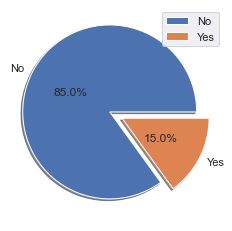

In [37]:
data = [1883,333]
keys = ['No','Yes']
explode = [0, 0.2]
colors = sns.color_palette('dark')[0:5]
plt.pie(x=data, autopct="%.1f%%", labels=keys, pctdistance=0.5, explode=[0.08]*2, shadow= True, textprops={'weight': 'light'})

plt.legend()
plt.show()

- dasaset is imbalance

<AxesSubplot:>

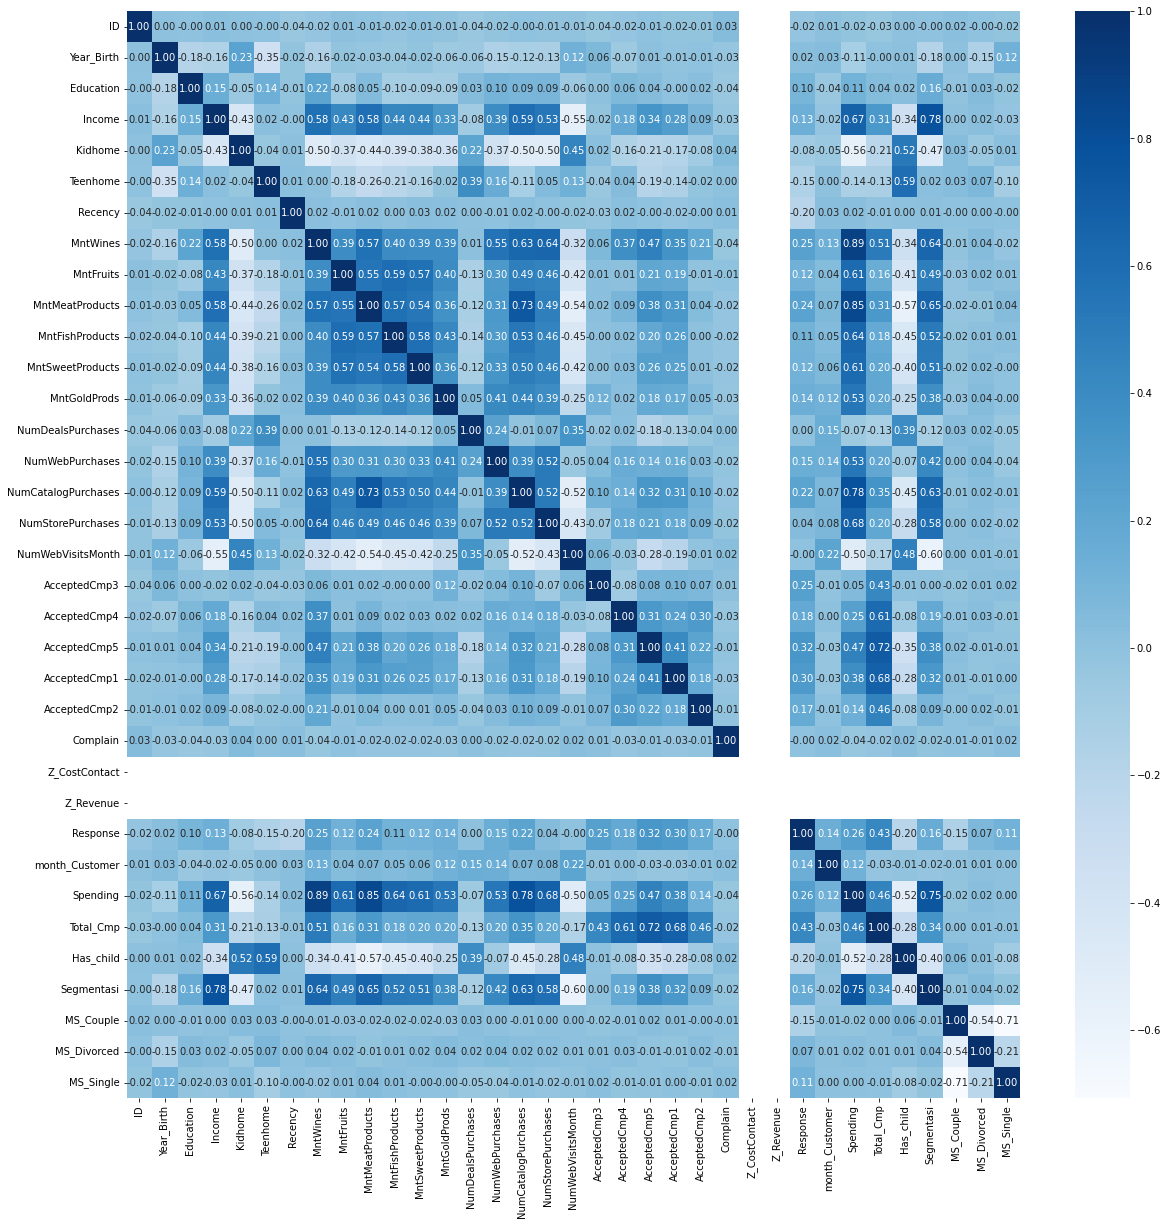

In [20]:
plt.figure(figsize=(20, 20))
sns.heatmap(df_clean.corr(), cmap='Blues', annot=True, fmt='.2f')

In [26]:
seg1 = df_clean.groupby(['Segmentasi', 'Response'])['ID'].count().reset_index(name='UniqueCustomer')
seg2 = df_clean.groupby(['Segmentasi'])['ID'].count().reset_index(name='AllUniqueCustomer')
seg = seg1.merge(seg2, how = 'inner', on='Segmentasi')
seg['PercentUniqueCustomer'] = round(seg['UniqueCustomer']*100.0/seg['AllUniqueCustomer'], 2)
seg= seg.sort_values('PercentUniqueCustomer', ascending= True)
seg= seg[seg['Response']==1]

(0.0, 30.0)

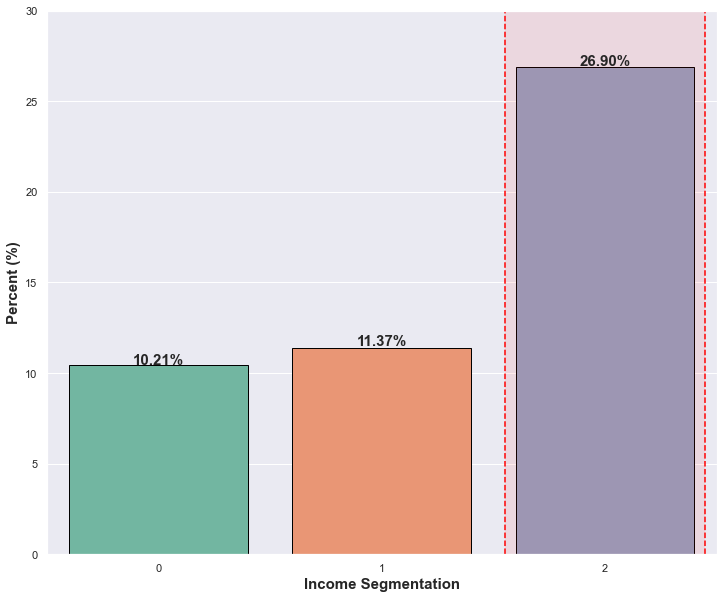

In [27]:
f, ax = plt.subplots(figsize=(12, 10))
sns.set_theme(style='darkgrid', palette='Set2')
sns.barplot(x = 'Segmentasi', y = 'PercentUniqueCustomer', data = seg,edgecolor = 'black')

plt.text(x = 2, y = 27, s = "26.90%", ha='center', fontsize=15, weight = 'bold')
plt.text(x = 1, y = 11.50, s = "11.37%", ha='center', fontsize=15, weight = 'bold')
plt.text(x = 0, y = 10.50, s = "10.21%", ha='center', fontsize=15, weight = 'bold')


plt.axvline(1.55, color='red', linestyle='--', ymin=0, ymax=2)
plt.axvline(2.45, color='red', linestyle='--', ymin=0, ymax=2)
plt.axvline(2, color='red', linestyle='-', ymin=0, ymax=2, lw = 200, alpha = .08)


plt.xlabel('Income Segmentation', weight = 'bold', fontsize=15)
plt.ylabel('Percent (%)', weight = 'bold', fontsize=15)

plt.ylim(0,30)

- Higher the income, more likely to give response for campaign

In [28]:
de1 = df_clean.groupby(['Education', 'Response'])['ID'].count().reset_index(name='UniqueCustomer')
de2 = df_clean.groupby(['Education'])['ID'].count().reset_index(name='AllUniqueCustomer')
de = de1.merge(de2, how = 'inner', on='Education')
de['PercentUniqueCustomer'] = round(de['UniqueCustomer']*100.0/de['AllUniqueCustomer'], 2) 
de= de.sort_values('PercentUniqueCustomer', ascending= True)
de= de[de['Response']==1]

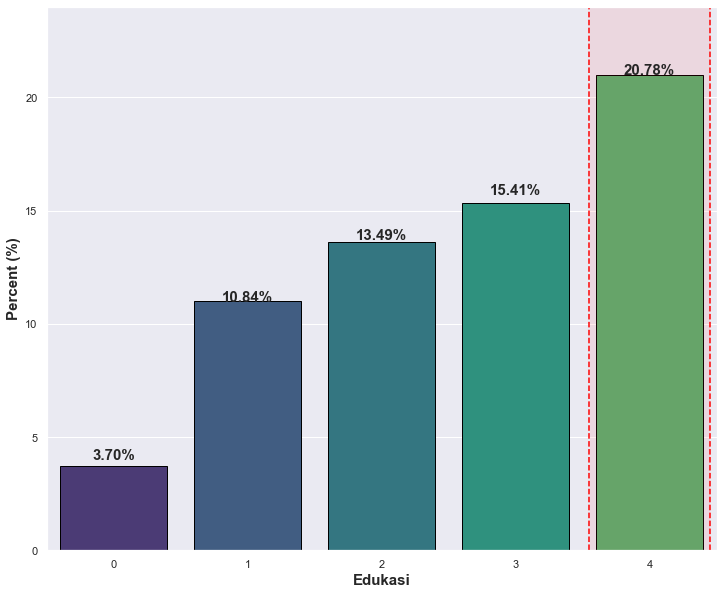

In [29]:
f, ax = plt.subplots(figsize=(12, 10))
sns.set_theme(style='darkgrid', palette = "viridis")
sns.barplot(x = 'Education', y = 'PercentUniqueCustomer', data = de, edgecolor = 'black', )

plt.text(x = 4, y = 21, s = "20.78%", ha='center', fontsize=15, weight = 'bold')
plt.text(x = 3, y = 15.70, s = "15.41%", ha='center', fontsize=15, weight = 'bold')
plt.text(x = 2, y = 13.70, s = "13.49%", ha='center', fontsize=15, weight = 'bold')
plt.text(x = 1, y = 11, s = "10.84%", ha='center', fontsize=15, weight = 'bold')
plt.text(x = 0, y = 4, s = "3.70%", ha='center', fontsize=15, weight = 'bold')

plt.axvline(3.55, color='red', linestyle='--', ymin=0, ymax=2)
plt.axvline(4.45, color='red', linestyle='--', ymin=0, ymax=2)
plt.axvline(4, color='red', linestyle='-', ymin=0, ymax=2, lw = 120, alpha = .08)


plt.xlabel('Edukasi', weight = 'bold', fontsize=15)
plt.ylabel('Percent (%)', weight = 'bold', fontsize=15)

plt.ylim(0,24)
plt.savefig('2.png')

In [30]:
me1 = df_clean.groupby(['Marital_Status', 'Response'])['ID'].count().reset_index(name='UniqueCustomer')
me2 = df_clean.groupby(['Marital_Status'])['ID'].count().reset_index(name='AllUniqueCustomer')
me = me1.merge(me2, how = 'inner', on='Marital_Status')
me['PercentUniqueCustomer'] = round(me['UniqueCustomer']*100.0/me['AllUniqueCustomer'], 2) 
me= me.sort_values('PercentUniqueCustomer', ascending= True)
me= me[me['Response']==1]

(0.0, 25.0)

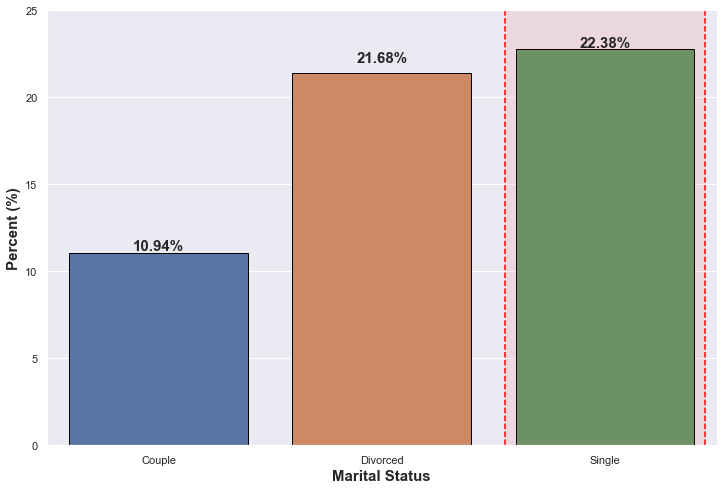

In [33]:
f, ax = plt.subplots(figsize=(12, 8))
sns.set_theme(style='darkgrid', palette = "deep")
sns.barplot(x = 'Marital_Status', y = 'PercentUniqueCustomer', data = me, edgecolor = 'black', )

plt.text(x = 2, y = 22.90, s = "22.38%", ha='center', fontsize=15, weight = 'bold')
plt.text(x = 1, y = 22, s = "21.68%", ha='center', fontsize=15, weight = 'bold')
plt.text(x = 0, y = 11.20, s = "10.94%", ha='center', fontsize=15, weight = 'bold')

plt.axvline(1.55, color='red', linestyle='--', ymin=0, ymax=2)
plt.axvline(2.45, color='red', linestyle='--', ymin=0, ymax=2)
plt.axvline(2, color='red', linestyle='-', ymin=0, ymax=2, lw = 200, alpha = .08)


plt.xlabel('Marital Status', weight = 'bold', fontsize=15)
plt.ylabel('Percent (%)', weight = 'bold', fontsize=15)

plt.ylim(0,25)

## Handle Imbalance Data

In [34]:
# we drop irrelevant features
X = df_clean.drop(columns=['Response','Z_CostContact','Z_Revenue',
                     'ID','Year_Birth','Dt_Customer','Marital_Status', 'Teenhome','Kidhome' ])
y = df_clean['Response'] # target / label

In [35]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 666)

In [36]:
#we use SMOTE 50% for handling imbalance data
from imblearn import under_sampling, over_sampling
X_over_SMOTE, y_over_SMOTE = over_sampling.SMOTE(0.5, random_state = 666).fit_resample(X_train, y_train)
print('SMOTE')
print(pd.Series(y_over_SMOTE).value_counts())

SMOTE
0    1314
1     657
Name: Response, dtype: int64


## Modeling with AdaBoost

In [41]:
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier(random_state=666)
ab.fit(X_over_SMOTE,y_over_SMOTE)

y_pred = ab.predict(X_test)
eval_classification(ab, X_over_SMOTE, y_over_SMOTE, X_test, y_test)

Accuracy (Test Set): 0.89
Precision (Test Set): 0.60
Recall (Test Set): 0.70
F1-Score (Test Set): 0.64
AUC: 0.93


In [42]:
print('Train score: ' + str(ab.score(X_over_SMOTE, y_over_SMOTE)))
print('Test score:' + str(ab.score(X_test, y_test)))

Train score: 0.8792491121258245
Test score:0.8887218045112782


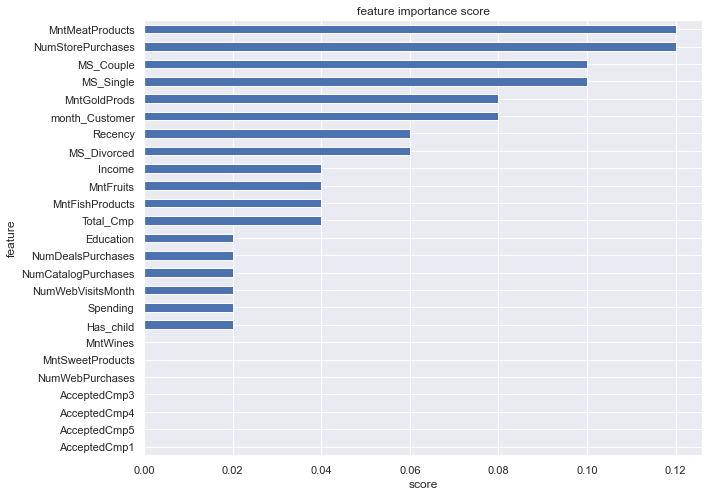

In [40]:
show_feature_importance(ab)

## Hyperparameter

In [43]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

# List of hyperparameter
hyperparameters = dict(n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)], # Jumlah iterasi
                       learning_rate = [float(x) for x in np.linspace(start = 0.001, stop = 0.1, num = 20)],  
                       algorithm = ['SAMME', 'SAMME.R']
                      )

# Init model
ab = AdaBoostClassifier(random_state=666)
ab_tuned = RandomizedSearchCV(ab, hyperparameters, random_state=666, cv=5, scoring='roc_auc')
ab_tuned.fit(X_over_SMOTE,y_over_SMOTE)

# Predict & Evaluation
y_pred = ab_tuned.predict(X_test)#Check performa dari model
eval_classification(ab_tuned, X_over_SMOTE, y_over_SMOTE, X_test, y_test)

Accuracy (Test Set): 0.90
Precision (Test Set): 0.66
Recall (Test Set): 0.64
F1-Score (Test Set): 0.65
AUC: 0.94


In [44]:
show_best_hyperparameter(ab_tuned.best_estimator_, hyperparameters)

Best n_estimators: 1500
Best learning_rate: 0.05831578947368421
Best algorithm: SAMME.R


In [45]:
print('Train score: ' + str(ab_tuned.score(X_over_SMOTE, y_over_SMOTE)))
print('Test score:' + str(ab_tuned.score(X_test, y_test)))

Train score: 0.9582583302637095
Test score:0.936511423550088


## Feature Importance

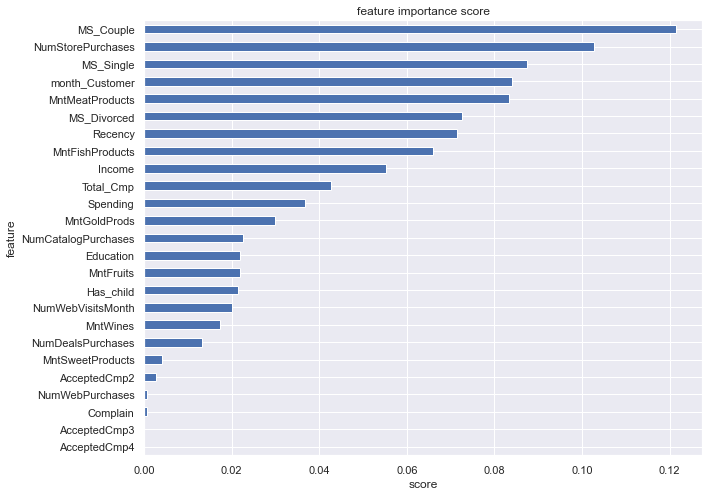

In [46]:
show_feature_importance(ab_tuned.best_estimator_)

#### Business recommendation
- We can give flyers to customers, that we will give discounts for sweets and fruit products
- we can also give bundling promo, if the customers buy meat product, they can get another products such as fruits and fish
- There are also loyalty program to maintain our customers

In [47]:
y_pred_proba = ab_tuned.predict_proba(X_test)
print("AUC: %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))

AUC: 0.94


In [48]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1) # pos_label: label yang kita anggap positive
auc(fpr, tpr)

0.7895888254247216

In [49]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1]) # pos_label: label yang kita anggap positive
auc=auc(fpr, tpr)
auc

0.936511423550088

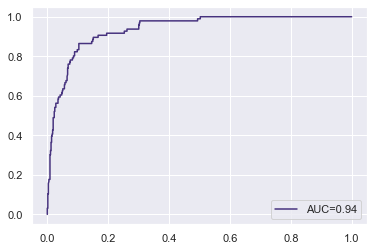

In [50]:
import matplotlib.pyplot as plt
sns.set_theme(style='darkgrid', palette = "viridis")
plt.plot(fpr,tpr,label="AUC=0.94")
plt.legend(loc=4)


In [ ]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state=666)
LR.fit(X_over_SMOTE, y_over_SMOTE)
y_pred = LR.predict(X_test)
eval_classification(LR, X_over_SMOTE, y_over_SMOTE, X_test, y_test)

In [ ]:
print('Train score: ' + str(LR.score(X_over_SMOTE, y_over_SMOTE))) #accuracy
print('Test score:' + str(LR.score(X_test, y_test))) #accuracy

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# List Hyperparameters yang akan diuji
penalty = ['l2','l1','elasticnet']
C = [0.0001, 0.001, 0.002] # Inverse of regularization strength; smaller values specify stronger regularization.
hyperparameters = dict(penalty=penalty, C=C)

# Inisiasi model
LR = LogisticRegression(random_state=42) # Init Logres dengan Gridsearch, cross validation = 5
LR_tuned = RandomizedSearchCV(LR, hyperparameters, cv=5, random_state=666, scoring='roc_auc')

# Fitting Model & Evaluation
LR_tuned.fit(X_over_SMOTE, y_over_SMOTE)
y_pred = LR_tuned.predict(X_test)
eval_classification(LR_tuned, X_over_SMOTE, y_over_SMOTE, X_test, y_test)

In [ ]:
print('Best algorithm:', LR_tuned.best_estimator_.get_params()['penalty'])
print('Best C:', LR_tuned.best_estimator_.get_params()['C'])

In [ ]:
print('Train score: ' + str(LR_tuned.score(X_over_SMOTE, y_over_SMOTE))) #accuracy
print('Test score:' + str(LR_tuned.score(X_test, y_test))) #accuracy

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=9)
KNN.fit(X_over_SMOTE, y_over_SMOTE)
y_pred = KNN.predict(X_test)
eval_classification(KNN, X_over_SMOTE, y_over_SMOTE, X_test, y_test)

In [ ]:
print('Train score: ' + str(KNN.score(X_over_SMOTE, y_over_SMOTE))) #accuracy
print('Test score:' + str(KNN.score(X_test, y_test))) #accuracy

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# List of hyperparameter
n_neighbors = list(range(1,30))
p=[1,2]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
hyperparameters = dict(n_neighbors=n_neighbors, p=p, algorithm=algorithm)

# Init model
knn = KNeighborsClassifier()
model = RandomizedSearchCV(knn, hyperparameters, cv=5, random_state=666, scoring='roc_auc')

# Fit Model & Evaluasi
model.fit(X_over_SMOTE, y_over_SMOTE)
y_pred = model.predict(X_test)
eval_classification(model, X_over_SMOTE, y_over_SMOTE, X_test, y_test)

In [ ]:
print('Best n_neighbors:', model.best_estimator_.get_params()['n_neighbors'])
print('Best p:', model.best_estimator_.get_params()['p'])
print('Best algorithm:', model.best_estimator_.get_params()['algorithm'])

In [ ]:
print('Train score: ' + str(model.score(X_over_SMOTE, y_over_SMOTE))) #accuracy
print('Test score:' + str(model.score(X_test, y_test))) #accuracy

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=666)
dtc.fit(X_over_SMOTE, y_over_SMOTE)
y_pred = dtc.predict(X_test)
eval_classification(dtc, X_over_SMOTE, y_over_SMOTE, X_test, y_test)

In [ ]:
print('Train score: ' + str(dtc.score(X_over_SMOTE, y_over_SMOTE))) #accuracy
print('Test score:' + str(dtc.score(X_test, y_test))) #accuracy

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform
import numpy as np

# List of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split

#### LENGKAPI DENGAN JAWABAN CHALLENGE TIME DISINI ####


hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features
                      )
#### TAMBAHKAN JAWABAN CHALLENGE TIME DISINI ####

# Inisialisasi Model
dt = DecisionTreeClassifier(random_state=666)
dt_tuned = RandomizedSearchCV(dt, hyperparameters, cv=5, scoring='roc_auc')
dt_tuned.fit(X_over_SMOTE, y_over_SMOTE)

# Predict & Evaluation
y_pred = dt_tuned.predict(X_test)#Check performa dari model
eval_classification(dt_tuned, X_over_SMOTE, y_over_SMOTE, X_test, y_test)

In [ ]:
print('Best max_depth:', dt_tuned.best_estimator_.get_params()['max_depth'])
print('Best min_samples_split:', dt_tuned.best_estimator_.get_params()['min_samples_split'])
print('Best min_samples_leaf:', dt_tuned.best_estimator_.get_params()['min_samples_leaf'])
print('Best max_features:', dt_tuned.best_estimator_.get_params()['max_features'])
print('Best criterion:', dt_tuned.best_estimator_.get_params()['criterion'])
print('Best splitter:', dt_tuned.best_estimator_.get_params()['splitter'])

In [ ]:
print('Train score: ' + str(dt_tuned.score(X_over_SMOTE, y_over_SMOTE)))
print('Test score:' + str(dt_tuned.score(X_test, y_test)))

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 10))
tree.plot_tree(dt_tuned.best_estimator_,
               feature_names = X.columns.tolist(), 
               class_names=['0','1'],
               filled = True, max_depth=5, fontsize=10)
plt.show()

In [ ]:
show_feature_importance(dt_tuned.best_estimator_)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=666)
rf.fit(X_over_SMOTE, y_over_SMOTE)
y_pred = rf.predict(X_test)
eval_classification(rf, X_over_SMOTE, y_over_SMOTE, X_test, y_test)

In [ ]:
print('Train score: ' + str(rf.score(X_over_SMOTE, y_over_SMOTE)))
print('Test score:' + str(rf.score(X_test, y_test)))

In [ ]:
show_feature_importance(rf)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#List Hyperparameters yang akan diuji
hyperparameters = dict(
                       n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)], # Jumlah subtree 
                       bootstrap = [True], # Apakah pakai bootstrapping atau tidak
                       criterion = ['gini','entropy'],
                       max_depth = [int(x) for x in np.linspace(10, 110, num = 11)],  # Maximum kedalaman tree
                       min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 10, num = 5)], # Jumlah minimum samples pada node agar boleh di split menjadi leaf baru
                       min_samples_leaf = [int(x) for x in np.linspace(start = 1, stop = 10, num = 5)], # Jumlah minimum samples pada leaf agar boleh terbentuk leaf baru
                       max_features = ['auto', 'sqrt', 'log2'], # Jumlah feature yg dipertimbangkan pada masing-masing split
                       n_jobs = [-1], # Core untuk parallel computation. -1 untuk menggunakan semua core
                      )

# Init
rf = RandomForestClassifier(random_state=666)
rf_tuned = RandomizedSearchCV(rf, hyperparameters, cv=5, random_state=666, scoring='roc_auc')
rf_tuned.fit(X_over_SMOTE,y_over_SMOTE)

# Predict & Evaluation
y_pred = rf_tuned.predict(X_test)#Check performa dari model
eval_classification(rf_tuned, X_over_SMOTE, y_over_SMOTE, X_test, y_test)

In [ ]:
show_best_hyperparameter(rf_tuned.best_estimator_, hyperparameters)

In [ ]:
print('Train score: ' + str(rf_tuned.score(X_over_SMOTE, y_over_SMOTE)))
print('Test score:' + str(rf_tuned.score(X_test, y_test)))

In [ ]:
show_feature_importance(rf_tuned.best_estimator_)

In [ ]:
from xgboost import XGBClassifier
xg = XGBClassifier(random_state=666)
xg.fit(X_over_SMOTE, y_over_SMOTE)

y_pred = xg.predict(X_test)
eval_classification(xg, X_over_SMOTE, y_over_SMOTE, X_test, y_test)

In [ ]:
print('Train score: ' + str(xg.score(X_over_SMOTE, y_over_SMOTE)))
print('Test score:' + str(xg.score(X_test, y_test)))

In [ ]:
show_feature_importance(xg)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

#Menjadikan ke dalam bentuk dictionary
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }

# Init
xg = XGBClassifier(random_state=666)
xg_tuned = RandomizedSearchCV(xg, hyperparameters, cv=5, random_state=666, scoring='roc_auc')
xg_tuned.fit(X_over_SMOTE,y_over_SMOTE)

# Predict & Evaluation
y_pred = xg_tuned.predict(X_test)#Check performa dari model
eval_classification(xg_tuned, X_over_SMOTE, y_over_SMOTE, X_test, y_test)

In [ ]:
show_best_hyperparameter(xg_tuned.best_estimator_, hyperparameters)

In [ ]:
print('Train score: ' + str(xg_tuned.score(X_over_SMOTE, y_over_SMOTE)))
print('Test score:' + str(xg_tuned.score(X_test, y_test)))

In [ ]:
show_feature_importance(xg_tuned.best_estimator_)